In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics
%matplotlib inline

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data pre-processing steps

In [25]:
df_train = pd.read_table('/home/sibi/acad/mach_learn_with_networks/assignment/2_lm_opt/bclass/bclass/bclass-train',delimiter='\t',header=None)
df_test = pd.read_table('/home/sibi/acad/mach_learn_with_networks/assignment/2_lm_opt/bclass/bclass/bclass-test',delimiter='\t',header=None)

In [61]:
#Converting -1 to 0
df_train.head()
df_train.loc[df_train[0] == -1,0] = 0
df_test.loc[df_test[0] == -1,0] = 0
"""We can uncomment the following two lines and run the whole code again. This is because, after initial exploration 
of the data, we see that the second column consists only of zeros."""
# df_train = df_train.drop(2, 1) 
# df_test = df_test.drop(2,1) 


'We can uncomment the following two lines and run the whole code again. This is because, after initial exploration \nof the data, we see that the second column consists only of zeros.'

In [62]:
#Splitting as features and labels
X_train = df_train.loc[:,1:]
y_train = df_train.loc[:,0]
X_test = df_test.loc[:,1:]
y_test = df_test.loc[:,0]

In [63]:
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Gradient Descent Function

In [64]:
def logistic_func(theta,x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

In [65]:

def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

In [66]:

def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [67]:
def pred_values(theta, X, hard=True):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [68]:
def grad_desc(theta_values, X_train, y_train, X_test, y_test, lr=.001, converge_change=.00001,n_iter = 100000):

    cost_iter = []
    train_pred_acc = []
    test_pred_acc = []
    cost = cost_func(theta_values, X_train, y_train)
    train_acc = metrics.accuracy_score(y_train, pred_values(theta_values, X_train))
    test_acc = metrics.accuracy_score(y_test, pred_values(theta_values, X_test))
    
    cost_iter.append([0, cost])
    train_pred_acc.append([0,train_acc])
    test_pred_acc.append([0,test_acc])
    change_cost = 1
    i = 1
    
    while(change_cost > converge_change and i < n_iter):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X_train, y_train))
        cost = cost_func(theta_values, X_train, y_train)
        train_acc = metrics.accuracy_score(y_train, pred_values(theta_values, X_train))
        test_acc = metrics.accuracy_score(y_test, pred_values(theta_values, X_test))

        cost_iter.append([i, cost])
        train_pred_acc.append([i, train_acc])
        test_pred_acc.append([i,test_acc])
        change_cost = old_cost - cost
        i+=1
        
    return theta_values, np.array(cost_iter), np.array(train_pred_acc), np.array(test_pred_acc)

In [69]:
X_train_m = X_train.as_matrix()
y_train_m = y_train.as_matrix()
X_test_m = X_test.as_matrix()
y_test_m = y_test.as_matrix()

In [70]:
shape = X_train_m.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter, train_pred_accuracy,test_pred_accuracy = grad_desc(betas, X_train_m, y_train_m,X_test_m, y_test_m)

# Plotting error rates

We plot the training and testing error rates as a function of iteration for the following cases :

1. Raw data
2. Data normalized to have unit l1 norm
3. Data normalized to have unit l2 norm

We also plot how the value of the cost function decreases with iterations to ensure the correctness of the program.

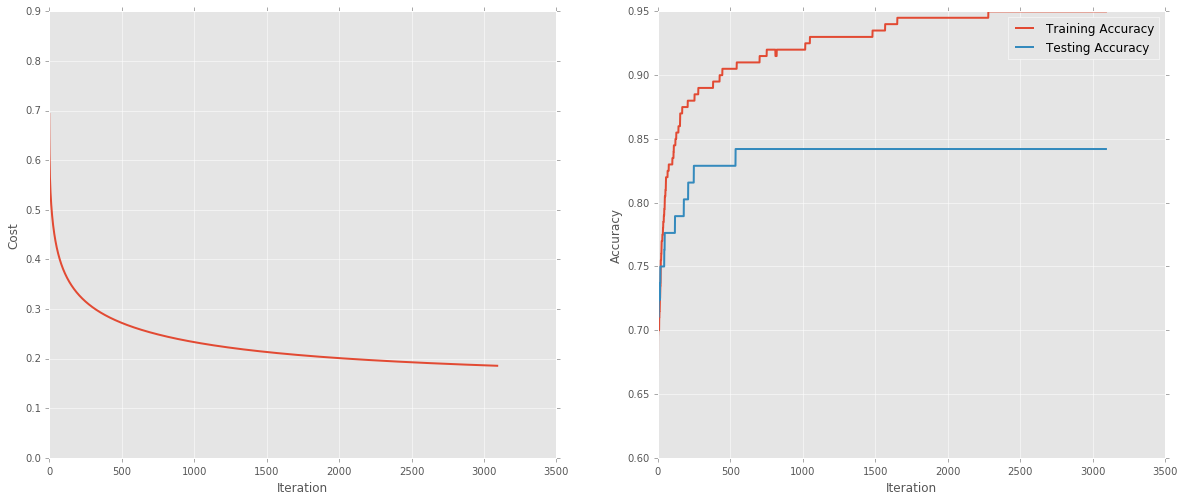

In [71]:
fig = plt.figure(figsize=(20, 8))
ax1= fig.add_subplot(1,2,1)
plt.style.use('ggplot')
ax1.plot(cost_iter[:,0], cost_iter[:,1],linewidth=2.0)

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.set_ylim(0,0.9)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_pred_accuracy[:,0], train_pred_accuracy[:,1],linewidth=2.0,label="Training Accuracy")
ax2.plot(test_pred_accuracy[:,0], test_pred_accuracy[:,1],linewidth=2.0,label="Testing Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")
ax2.legend()

In [72]:
X_train_norm_l1 = preprocessing.normalize(X_train_m, norm='l1')
X_test_norm_l1 = preprocessing.normalize(X_test_m, norm='l1')

In [73]:
shape = X_train_norm_l1.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter, train_pred_accuracy,test_pred_accuracy = grad_desc(betas, X_train_norm_l1, y_train_m,X_test_norm_l1, y_test_m)

0.81
0.815789473684


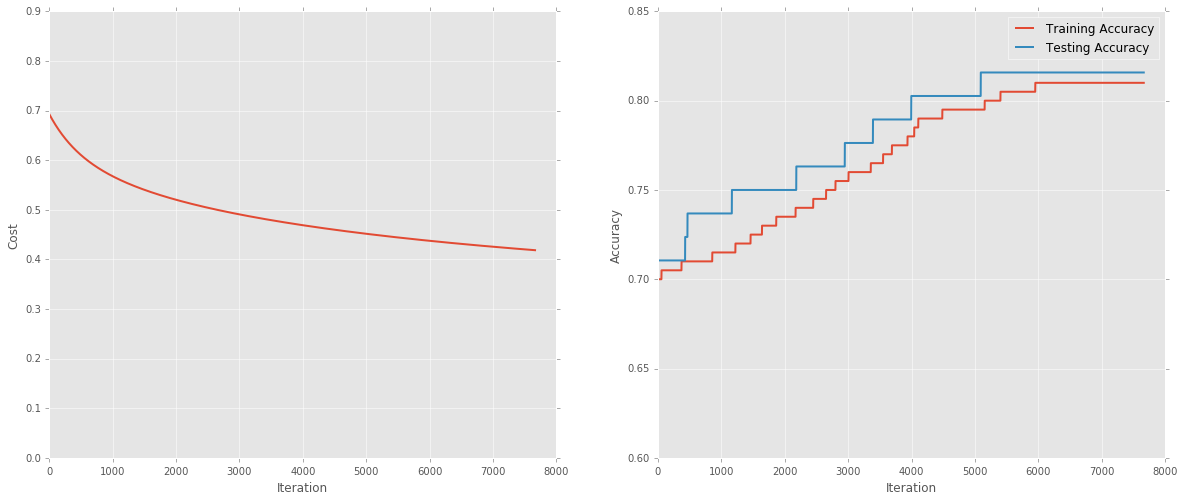

In [74]:
print train_pred_accuracy[-1,1]
print test_pred_accuracy[-1,1]

fig = plt.figure(figsize=(20, 8))
ax1= fig.add_subplot(1,2,1)
plt.style.use('ggplot')
ax1.plot(cost_iter[:,0], cost_iter[:,1],linewidth=2.0)

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.set_ylim(0,0.9)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_pred_accuracy[:,0], train_pred_accuracy[:,1],linewidth=2.0,label="Training Accuracy")
ax2.plot(test_pred_accuracy[:,0], test_pred_accuracy[:,1],linewidth=2.0,label="Testing Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")
ax2.legend()

In [75]:

X_train_norm_l2 = preprocessing.normalize(X_train_m, norm='l2')
X_test_norm_l2 = preprocessing.normalize(X_test_m, norm='l2')

In [76]:
shape = X_train_norm_l1.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter, train_pred_accuracy,test_pred_accuracy = grad_desc(betas, X_train_norm_l2, y_train_m,X_test_norm_l2, y_test_m)

0.88
0.842105263158


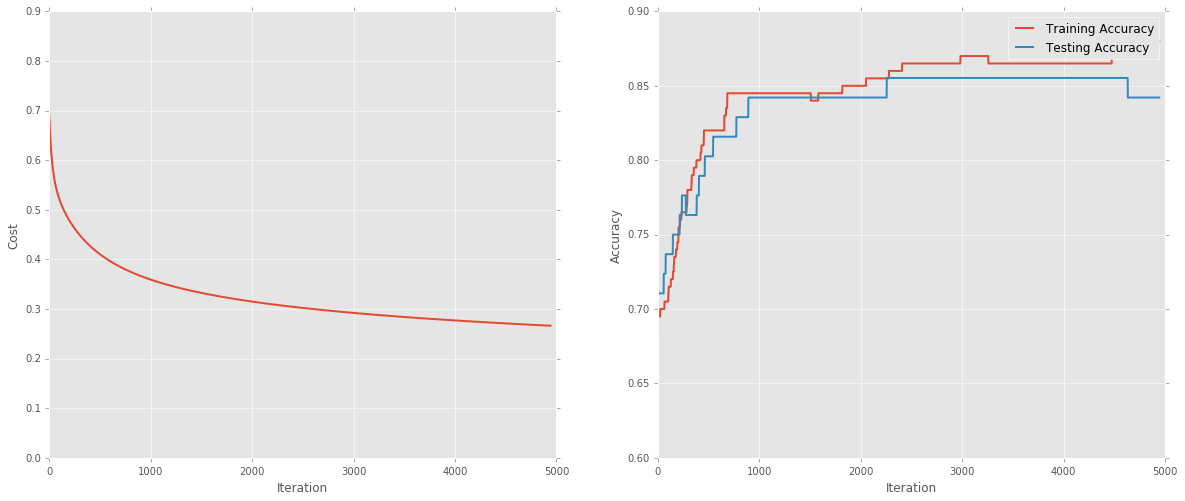

In [77]:
print train_pred_accuracy[-1,1]
print test_pred_accuracy[-1,1]

fig = plt.figure(figsize=(20, 8))
ax1= fig.add_subplot(1,2,1)
plt.style.use('ggplot')
ax1.plot(cost_iter[:,0], cost_iter[:,1],linewidth=2.0)

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.set_ylim(0,0.9)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_pred_accuracy[:,0], train_pred_accuracy[:,1],linewidth=2.0,label="Training Accuracy")
ax2.plot(test_pred_accuracy[:,0], test_pred_accuracy[:,1],linewidth=2.0,label="Testing Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")
ax2.legend()

## Which seems to work best?
The <b>data normalized to unit l2 norm</b>, giving an accuracy of 0.86 (after 2100 iterations), works better than the raw data and data normalized to l1 norm (accuracy of 0.81).